<a href="https://colab.research.google.com/github/rawatpremsingh999/tensorflow-coursera/blob/master/coursera_2206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Augmentations

**Train Images without augmentation:**

In [1]:
# Download the data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-01-26 11:25:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  81.8MB/s    in 0.8s    

2021-01-26 11:25:50 (81.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# importing naccessary libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Extract images from zip file
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
# Build a Convolution Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Define compilation of images
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# Train the Network
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 16s - loss: 0.6916 - accuracy: 0.5350 - val_loss: 0.6788 - val_accuracy: 0.5140
Epoch 2/100
100/100 - 8s - loss: 0.6633 - accuracy: 0.6100 - val_loss: 0.6489 - val_accuracy: 0.6150
Epoch 3/100
100/100 - 8s - loss: 0.6312 - accuracy: 0.6475 - val_loss: 0.6150 - val_accuracy: 0.6740
Epoch 4/100
100/100 - 8s - loss: 0.5910 - accuracy: 0.6885 - val_loss: 0.6106 - val_accuracy: 0.6500
Epoch 5/100
100/100 - 8s - loss: 0.5498 - accuracy: 0.7260 - val_loss: 0.5928 - val_accuracy: 0.6850
Epoch 6/100
100/100 - 8s - loss: 0.5271 - accuracy: 0.7395 - val_loss: 0.5692 - val_accuracy: 0.7120
Epoch 7/100
100/100 - 8s - loss: 0.4892 - accuracy: 0.7545 - val_loss: 0.5524 - val_accuracy: 0.7100
Epoch 8/100
100/100 - 8s - loss: 0.4605 - accuracy: 0.7845 - val_loss: 0.5908 - val_accuracy: 0.6880
Epoch 9/100
100/100 - 8s - loss: 0.4330 - accuracy: 0.7995 - val_loss: 0.5376 - val_accuracy: 0.7260
Epoch 10/100
100/100 - 8s - loss: 0.4013 - accuracy: 0.8225 - val_loss: 0.5382 - val_accur

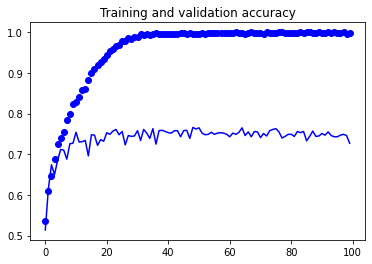

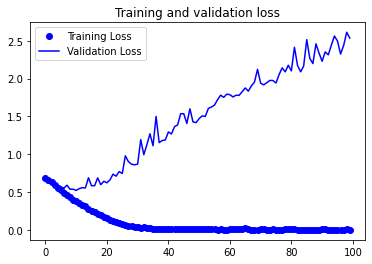

In [9]:
# Loss and Accuracy graph
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting.

So, we will use augmentation of images to overcome overfitting problem. 

We tweak with the images to change this up a bit -- rotate the image, squash it, etc. That's what image augementation is all about.

Now take a look at the ImageGenerator. There are properties on it that we can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```


* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [10]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 18s - loss: 1.2179 - accuracy: 0.6700 - val_loss: 0.5610 - val_accuracy: 0.7220
Epoch 2/100
100/100 - 17s - loss: 0.6145 - accuracy: 0.6680 - val_loss: 0.5252 - val_accuracy: 0.7440
Epoch 3/100
100/100 - 17s - loss: 0.5834 - accuracy: 0.6985 - val_loss: 0.5232 - val_accuracy: 0.7220
Epoch 4/100
100/100 - 17s - loss: 0.5763 - accuracy: 0.7035 - val_loss: 0.5119 - val_accuracy: 0.7490
Epoch 5/100
100/100 - 17s - loss: 0.5723 - accuracy: 0.7065 - val_loss: 0.4946 - val_accuracy: 0.7690
Epoch 6/100
100/100 - 17s - loss: 0.5667 - accuracy: 0.7195 - val_loss: 0.4977 - val_accuracy: 0.7710
Epoch 7/100
100/100 - 17s - loss: 0.5589 - accuracy: 0.7225 - val_loss: 0.5176 - val_accuracy: 0.7460
Epoch 8/100
100/100 - 17s - loss: 0.5475 - accuracy: 0.7295 - val_loss: 0.5294 - val_accuracy: 0.7260
Epoch 9/100
100/100 - 17s - loss: 0.5455 - accuracy: 0.7220 - val_loss: 0.4794 - val_accuracy: 0.7720
Epoch 10/100
100/100 - 17s - loss: 0.5536 - accuracy: 0.7195 - val_loss: 0.5773 - 

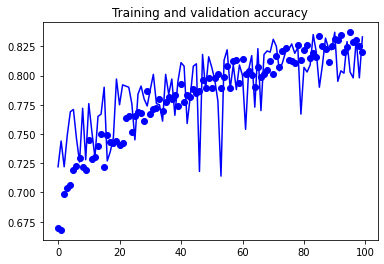

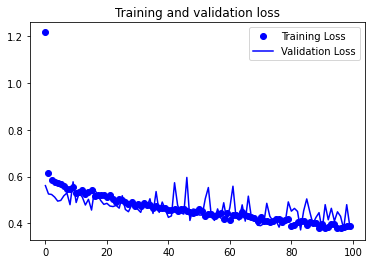

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()